In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy.stats import pearsonr

In [ ]:
column_names = ['age',
                'bp',
                'sg',
                'al',
                'su',
                'rbc',
                'pc',
                'pcc',
                'ba',
                'bgr',
                'bu',
                'sc',
                'sod',
                'pot',
                'hemo',
                'pcv',
                'wbcc',
                'rbcc',
                'htn',
                'dm',
                'cad',
                'appet',
                'pe',
                'ane',
                'class' ]

In [ ]:
# Step 1: Fetch the data
# url = "https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease"
data = pd.read_csv("chronic_kidney_disease_data.csv", sep=',',header = 0,index_col=None)

FileNotFoundError: ignored

In [ ]:
data.head(10)

NameError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [ ]:
data_original = data.copy()

In [ ]:
data = data.drop(['sg','al',
                'su',
                'rbc',
                'pc',
                'pcc',
                'ba','htn',
                'dm',
                'cad',
                'appet',
                'pe',
                'ane'],axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   bgr     400 non-null    float64
 3   bu      381 non-null    float64
 4   sc      383 non-null    float64
 5   sod     313 non-null    float64
 6   pot     312 non-null    float64
 7   hemo    348 non-null    float64
 8   pcv     400 non-null    float64
 9   wc      295 non-null    float64
 10  rc      270 non-null    float64
 11  class   400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [ ]:
data.age.value_counts()

60.000000    20
65.000000    17
48.000000    12
55.000000    12
50.000000    12
             ..
49.666667     1
70.500000     1
7.000000      1
82.000000     1
79.000000     1
Name: age, Length: 82, dtype: int64

In [ ]:
data['rc'] = data['rc'].astype(float)

In [ ]:
data['sod'] = data['sod'].interpolate()

In [ ]:
average = data['pot'].mean()
average

4.594710327455919

In [ ]:
data['pot'] = data['pot'].fillna(average)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [ ]:
y = data['class']

In [ ]:
x = data.drop('class',axis=1)

In [ ]:
data['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [ ]:
data['class'] = data['class'].replace('ckd\t', 'ckd')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_binary = lb.fit_transform(y)

In [ ]:
y_binary = lb.fit_transform(y)

In [ ]:
len(y_binary)

400

In [ ]:
# Step 4: Train classification algorithms
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())

rf_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
ada_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

NameError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y_binary)

In [ ]:
len(y_resampled)

500

In [ ]:
data.to_csv("data_after_preprocessing.csv")

In [ ]:
# Assuming the dataset contains the appropriate columns and headers

# Step 2: Preprocess the data
# You need to clean and preprocess the data, which may include handling missing values and encoding categorical variables.

# Step 3: Create training and test sets
# X = data.iloc[:, :-1]  # Features
# y = data.iloc[:, -1]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Train classification algorithms
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())

rf_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
ada_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

<ipython-input-116-5ebb3318c447>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# Step 5: Evaluate and compare performance
classifiers = [rf_classifier, nb_classifier, dt_classifier, svm_classifier, ada_classifier, bagging_classifier]
classifier_names = ["Random Forest", "Naive Bayes", "Decision Tree", "SVM", "AdaBoost", "Bagging"]

precision_scores, recall_scores, f1_scores = [], [], []

for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
type(y_pred)

numpy.ndarray

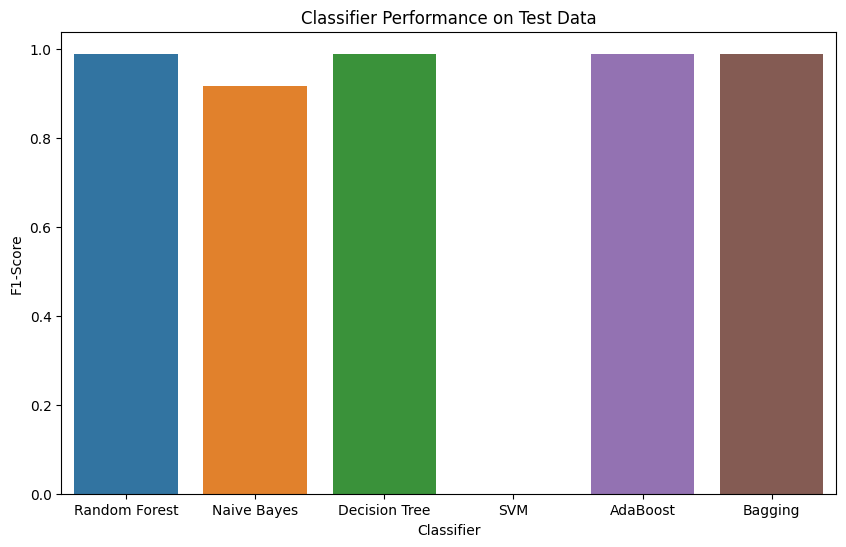

In [ ]:
# Create a comparison graph using Seaborn
performance_df = pd.DataFrame({
    "Classifier": classifier_names,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Classifier", y="F1-Score")
plt.title("Classifier Performance on Test Data")
plt.ylabel("F1-Score")
plt.show()

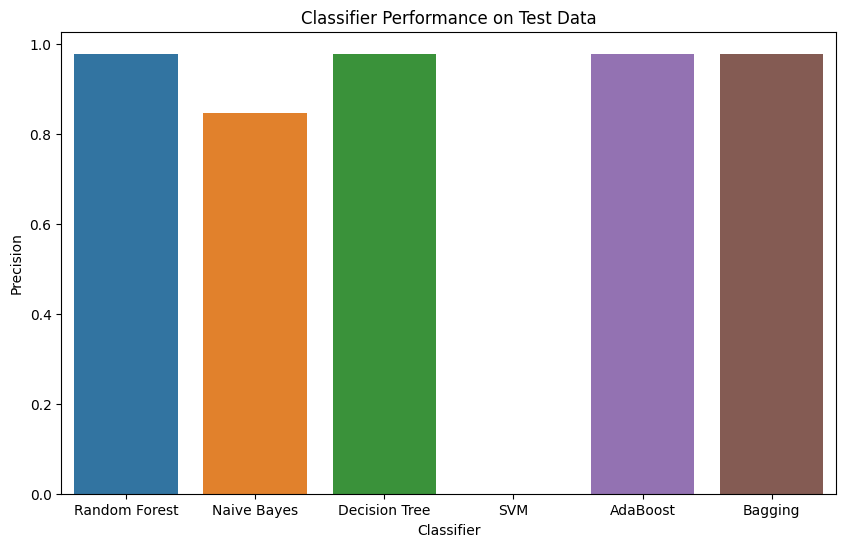

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Classifier", y="Precision")
plt.title("Classifier Performance on Test Data")
plt.ylabel("Precision")
plt.show()

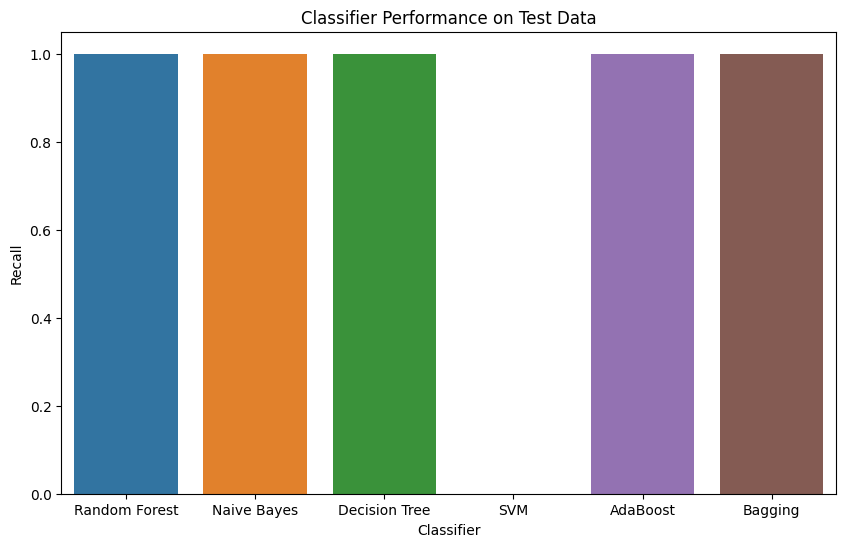

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Classifier", y="Recall")
plt.title("Classifier Performance on Test Data")
plt.ylabel("Recall")
plt.show()

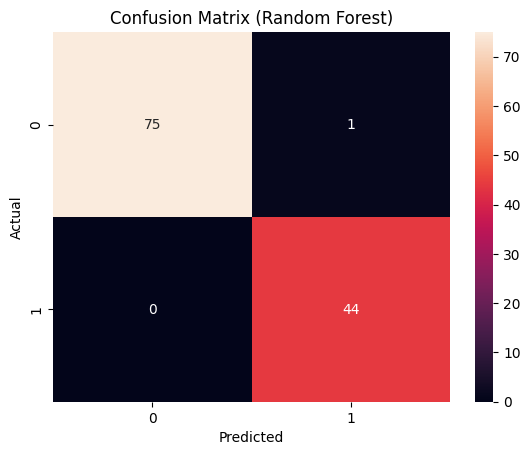

In [ ]:
# Step 6: Create Confusion Matrix, ROC Curve, and Correlation Coefficient
# You can create these using the metrics and functions provided by Scikit-Learn and other libraries.

# Example: Confusion Matrix for Random Forest
y_pred_rf = rf_classifier.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

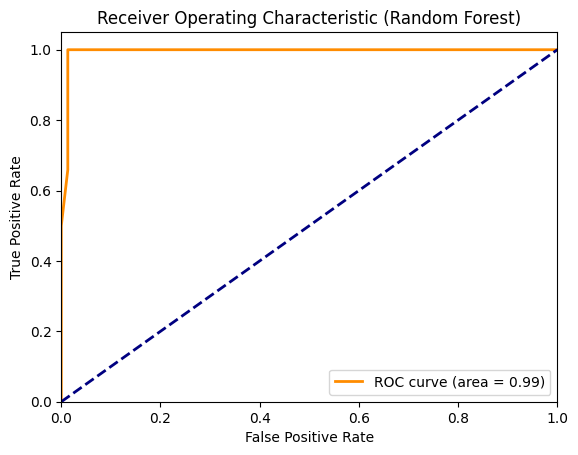

In [ ]:
# Example: ROC Curve for Random Forest
y_scores_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Example: Confusion Matrix for Naive Bayes
y_pred_nb = nb_classifier.predict(X_test)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt="d")
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

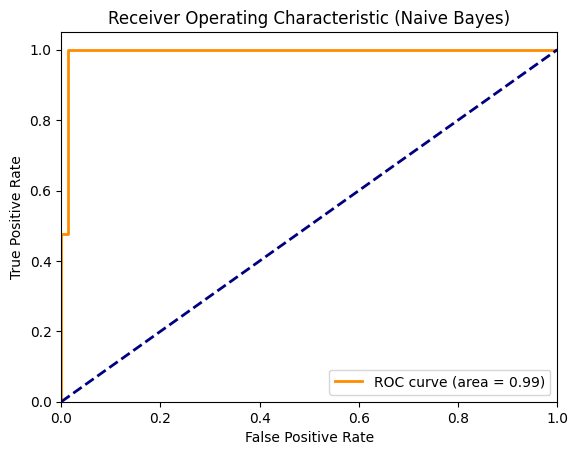

In [ ]:
# Example: ROC Curve for Naive Bayes
y_scores_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

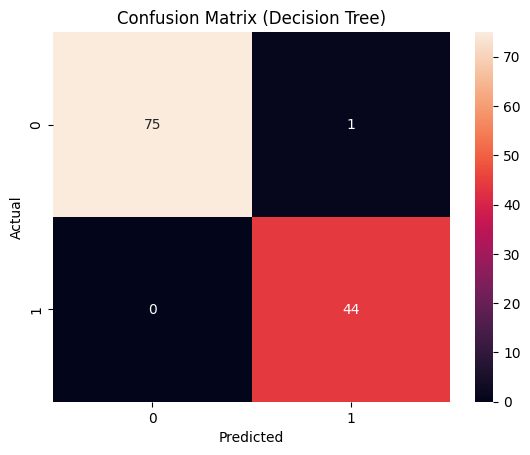

In [ ]:
# Example: Confusion Matrix for Naive Bayes
y_pred_dt = dt_classifier.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

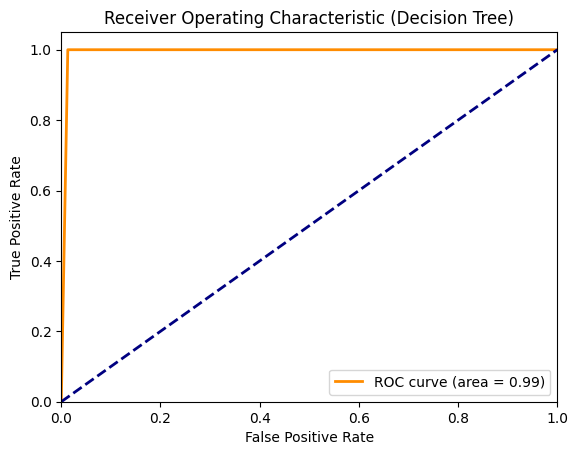

In [ ]:
# Example: ROC Curve for decision tree
y_scores_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_dt)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

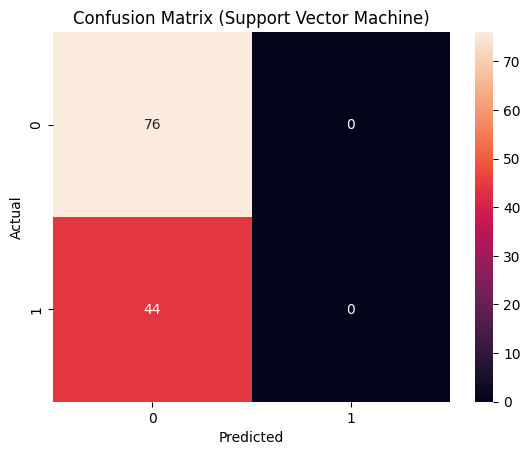

In [ ]:
# Example: Confusion Matrix for Support Vector Machine
y_pred_svm = svm_classifier.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d")
plt.title("Confusion Matrix (Support Vector Machine)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Example: ROC Curve for Support Vector Machine
y_scores_svm = svm_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()

AttributeError: ignored

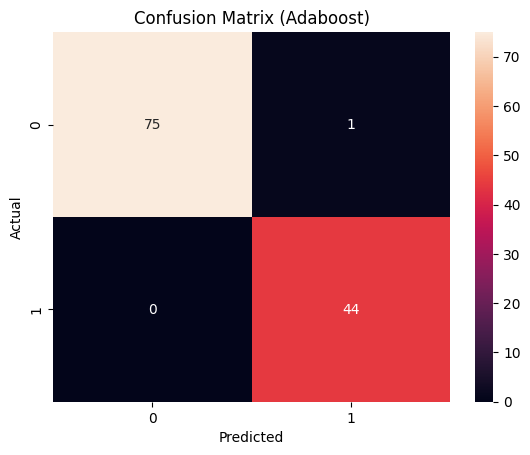

In [ ]:
# Example: Confusion Matrix for Adaboost
y_pred_ada = ada_classifier.predict(X_test)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(conf_matrix_ada, annot=True, fmt="d")
plt.title("Confusion Matrix (Adaboost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

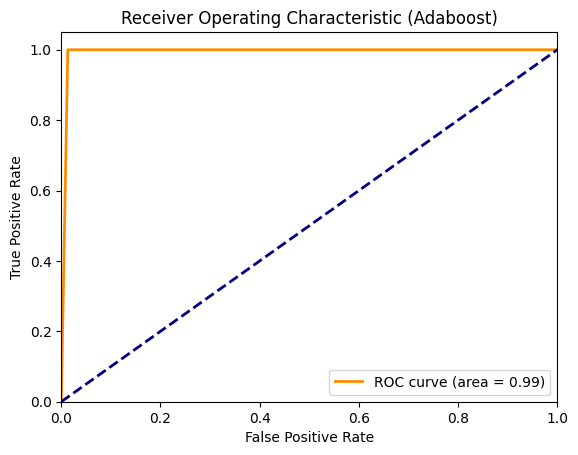

In [ ]:
# Example: ROC Curve for Adaboost
y_scores_ada = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_ada)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Adaboost)')
plt.legend(loc="lower right")
plt.show()

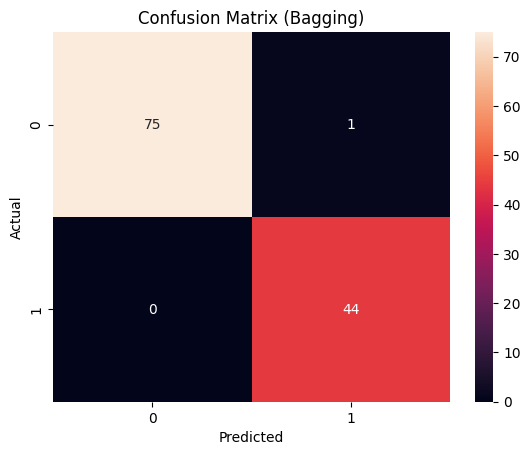

In [ ]:
# Example: Confusion Matrix for Bagging
y_pred_bg = bagging_classifier.predict(X_test)
conf_matrix_bg = confusion_matrix(y_test, y_pred_bg)
sns.heatmap(conf_matrix_bg, annot=True, fmt="d")
plt.title("Confusion Matrix (Bagging)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

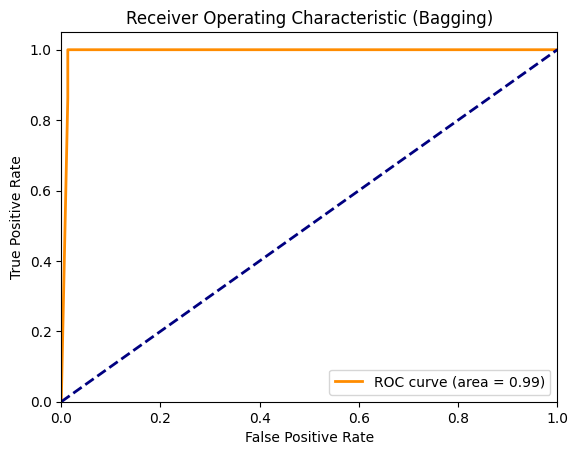

In [ ]:
# Example: ROC Curve for Bagging
y_scores_bg = bagging_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_bg)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bagging)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
classifiers = [rf_classifier, nb_classifier, dt_classifier, svm_classifier, ada_classifier, bagging_classifier]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   bgr     400 non-null    float64
 3   bu      400 non-null    float64
 4   sc      400 non-null    float64
 5   sod     400 non-null    float64
 6   pot     400 non-null    float64
 7   hemo    400 non-null    float64
 8   pcv     400 non-null    float64
 9   wc      400 non-null    float64
 10  rc      400 non-null    float64
 11  class   400 non-null    object 
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [ ]:
data.to_csv("data_after_preprocessing.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd

In [ ]:
data_ckd= pd.read_csv("data_after_preprocessing.csv", sep=',')


In [ ]:
data_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   age         400 non-null    float64
 2   bp          400 non-null    float64
 3   bgr         400 non-null    float64
 4   bu          400 non-null    float64
 5   sc          400 non-null    float64
 6   sod         400 non-null    float64
 7   pot         400 non-null    float64
 8   hemo        400 non-null    float64
 9   pcv         400 non-null    float64
 10  wc          400 non-null    float64
 11  rc          400 non-null    float64
 12  class       400 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 40.8+ KB


In [ ]:
data_ckd.head(10)

,Unnamed: 0,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
0,0,48.0,80.0,121.0,36.0,1.2,136.863980,4.59471,15.4,44.0,7800.0,5.200000,ckd
1,1,7.0,50.0,272.0,18.0,0.8,136.863980,4.59471,11.3,38.0,6000.0,4.766667,ckd
2,2,62.0,80.0,423.0,53.0,1.8,136.863980,4.59471,9.6,31.0,7500.0,4.333333,ckd
3,3,48.0,70.0,117.0,56.0,3.8,111.000000,2.50000,11.2,32.0,6700.0,3.900000,ckd
4,4,51.0,80.0,106.0,26.0,1.4,126.500000,2.85000,11.6,35.0,7300.0,4.600000,ckd
5,5,60.0,90.0,74.0,25.0,1.1,142.000000,3.20000,12.2,39.0,7800.0,4.400000,ckd
6,6,68.0,70.0,100.0,54.0,24.0,104.000000,4.00000,12.4,36.0,7350.0,4.700000,ckd
7,7,24.0,85.0,410.0,31.0,1.1,107.333333,3.90000,12.4,44.0,6900.0,5.000000,ckd
8,8,52.0,100.0,138.0,60.0,1.9,110.666667,3.80000,10.8,33.0,9600.0,4.000000,ckd
9,9,53.0,90.0,70.0,107.0,7.2,114.000000,3.70000,9.5,29.0,12100.0,3.700000,ckd


In [ ]:
data_ckd = data_ckd.drop('Unnamed: 0',axis=1)

In [ ]:
y = data_ckd['class']

In [ ]:
X = data_ckd.drop('class',axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_binary = lb.fit_transform(y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binary)

In [ ]:
# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    #"AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier())
}

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# Perform 10-fold cross-validation and store the mean accuracy for each classifier
mean_accuracies = []
classifier_names = []
scores_list = []

In [ ]:
for classifier_name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_resampled, y_resampled, cv=10, scoring='accuracy')
    scores_list.append(scores)
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)
    classifier_names.append(classifier_name)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

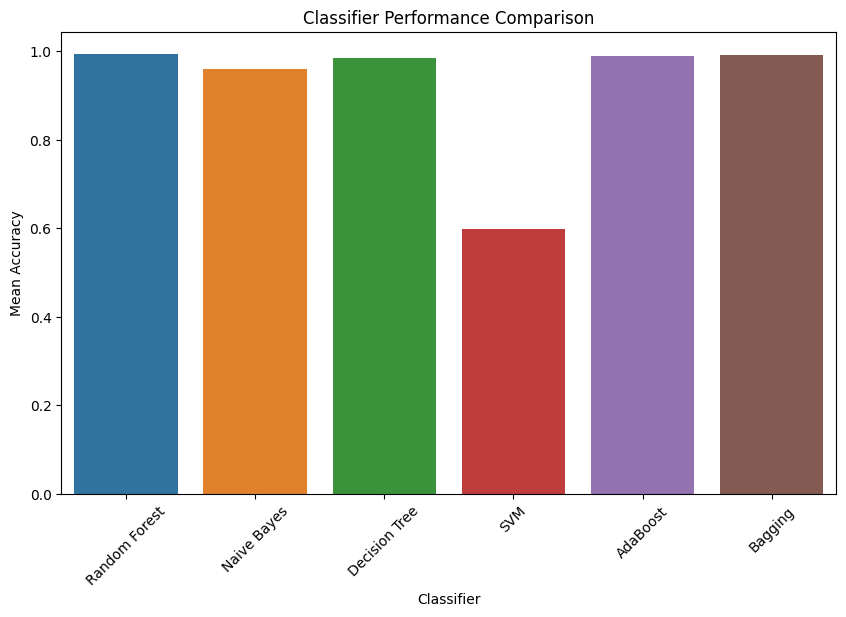

In [ ]:
# Create a bar plot to compare classifier performance
plt.figure(figsize=(10, 6))
sns.barplot(x=classifier_names, y=mean_accuracies)
plt.title("Classifier Performance Comparison")
plt.xlabel("Classifier")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
print(scores_list)

[array([0.98, 1.  , 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.98, 0.94, 0.98, 0.98, 0.86, 1.  , 0.96, 1.  , 0.94, 0.96]), array([0.98, 0.96, 0.94, 1.  , 0.96, 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.54, 0.48, 0.58, 0.62, 0.7 , 0.68, 0.58, 0.74, 0.42, 0.64]), array([0.98, 0.96, 0.98, 1.  , 0.98, 1.  , 1.  , 1.  , 1.  , 1.  ]), array([0.98, 0.98, 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])]
